In [1]:
# denoising autoencoder of Geron
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

mnist = input_data.read_data_sets("/tmp/data/")

def plot_image(image, shape=[28, 28]):
    plt.imshow(image.reshape(shape), cmap="Greys", interpolation="nearest")
    plt.axis("off")

def show_reconstructed_digits(X, outputs, model_path = None, n_test_digits = 2):
    with tf.Session() as sess:
        if model_path:
            saver.restore(sess, model_path)
        X_test = mnist.test.images[:n_test_digits]
        state = outputs.eval(feed_dict={X: X_test})
        state = state + noise_level * np.random.normal()
        state = outputs.eval(feed_dict={X: state})
        state = state + noise_level * np.random.normal()
        outputs_val = outputs.eval(feed_dict={X: state})

    fig = plt.figure(figsize=(8, 3 * n_test_digits))
    for digit_index in range(n_test_digits):
        plt.subplot(n_test_digits, 2, digit_index * 2 + 1)
        plot_image(X_test[digit_index])
        plt.subplot(n_test_digits, 2, digit_index * 2 + 2)
        plot_image(outputs_val[digit_index])
        
def show_reconstructed_digits_clamp(X, outputs, model_path = None, n_test_digits = 2):
    with tf.Session() as sess:
        if model_path:
            saver.restore(sess, model_path)
        X_test = mnist.test.images[:n_test_digits]
        w = int (len(X_test)/2)
        clamp = X_test +noise_level * np.random.normal(X_test[w:])
        outputs_val = outputs.eval(feed_dict={X: clamp})

    fig = plt.figure(figsize=(8, 3 * n_test_digits))
    for digit_index in range(n_test_digits):
        plt.subplot(n_test_digits, 2, digit_index * 2 + 1)
        plot_image(X_test[digit_index])
        plt.subplot(n_test_digits, 2, digit_index * 2 + 2)
        plot_image(outputs_val[digit_index])

C:\Users\junta\Anaconda2\envs\py3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


09% Train MSE: 0.04262119
1 Train MSE: 0.042793676
29% Train MSE: 0.040226344
3 Train MSE: 0.039964136
4 Train MSE: 0.038550925
59% Train MSE: 0.042341948
6 Train MSE: 0.042299494
79% Train MSE: 0.041522965
8 Train MSE: 0.042044878
99% Train MSE: 0.039646856
INFO:tensorflow:Restoring parameters from ./my_model_stacked_denoising_gaussian.ckpt
INFO:tensorflow:Restoring parameters from ./my_model_stacked_denoising_gaussian.ckpt


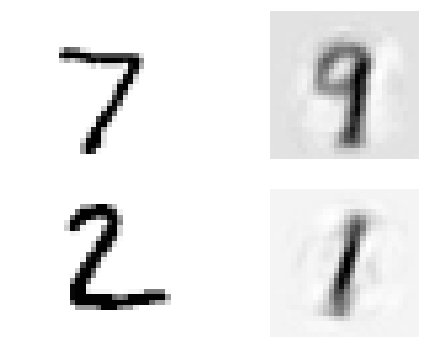

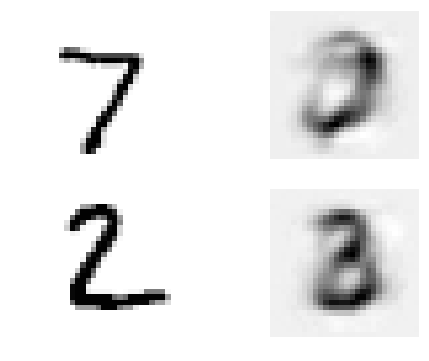

In [2]:
n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 150  # codings
n_hidden3 = n_hidden1
n_outputs = n_inputs

learning_rate = 0.01

noise_level = 1.0

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
X_noisy = X + noise_level * tf.random_normal(tf.shape(X))

hidden1 = tf.layers.dense(X_noisy, n_hidden1, activation=tf.nn.relu,
                          name="hidden4")
hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, # not shown in the book
                          name="hidden5")                            # not shown
hidden3 = tf.layers.dense(hidden2, n_hidden3, activation=tf.nn.relu, # not shown
                          name="hidden6")                            # not shown
outputs = tf.layers.dense(hidden3, n_outputs, name="outputs7")        # not shown

reconstruction_loss = tf.reduce_mean(tf.square(outputs - X)) # MSE

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(reconstruction_loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()



n_epochs = 10
batch_size = 150


with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches = mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            print("\r{}%".format(100 * iteration // n_batches), end="")
            sys.stdout.flush()
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch})
        loss_train = reconstruction_loss.eval(feed_dict={X: X_batch})
        print("\r{}".format(epoch), "Train MSE:", loss_train)
        saver.save(sess, "./my_model_stacked_denoising_gaussian.ckpt")

        
show_reconstructed_digits(X, outputs, "./my_model_stacked_denoising_gaussian.ckpt")
show_reconstructed_digits_clamp(X, outputs, "./my_model_stacked_denoising_gaussian.ckpt")
plt.show()